In [1]:
import happi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import kv
from scipy.integrate import quad
import scipy.integrate as integrate

# plt.rc('text', usetex=True)

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 16#20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['lines.linewidth'] = 1.2

colors = ['#0036A6', '#FF6319', '#00933C', '#FC0009', '#60269E', '#996633',
          '#B933AD', '#808183', '#FFBE00', '#6CBE45', '#A7A9AC', '#000000']
cnames = ['blue', 'orange', 'green', 'red', 'violet', 'brown', 'magenta',
          'grey', 'yellow', 'lightgreen', ' lightgrey']

In [3]:
S = happi.Open('/Volumes/LaCie/Data_Smilei/shock_2d_ne2e18_v1300_Bz0_angle90_Te400_Ti200_Lx3200_mi1/', reference_angular_frequency_SI=56375055300167.87)

Loaded simulation '/Volumes/LaCie/Data_Smilei/shock_2d_ne2e18_v1300_Bz0_angle90_Te400_Ti200_Lx3200_mi1/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics


In [4]:
m = 9.10938356e-31 # (*kg*)
c = 3e8 # (* m/s *)
e = 1.6e-19 # (*coulombs*)
ptive_inf = float('inf')

Units = happi.Units("um", "cm^{-3}", "ns", "V/m", "T", "um/ns","eV")

In [5]:
dx = S.namelist.Main.cell_length[0]
dy = S.namelist.Main.cell_length[1]
Lx = S.namelist.Main.grid_length[0]
Ly = S.namelist.Main.grid_length[1]
V  = Lx * Ly
wr = S.namelist.w_r
# wr = 56375055300167.87  # Reference_SI
dt = S.namelist.d_t

In [6]:
ts = S.ParticleBinning(1).getTimesteps()

In [8]:
ts[-1]

433316

In [28]:
iteration = ts[0]
simulation_time = iteration * dt / wr
print wr
print simulation_time

5.63750553002e+13
0.0


In [29]:
pb = S.ParticleBinning(1).get(iteration)

In [30]:
ekin =  pb['ekin'] * 0.511 # Unit of MeV
data = pb['data'][0] # N_r / K_r
de = ekin[1]-ekin[0]
total_weight = sum(data*de)*V
# total_weight = sum(data)
# data_norm = data/norm_s
data_norm = data  #* (c/S.namelist.wr)**2

In [31]:
print("Data from Particle Binning energy distribution")
print('Bin size: {}'.format(de))
print("Total kinetic energy: {}".format(sum(data*de*ekin*V)))
print("Integration: {}".format(total_weight))

Data from Particle Binning energy distribution
Bin size: 0.0002044
Total kinetic energy: 3016.89094753
Integration: 490560.0


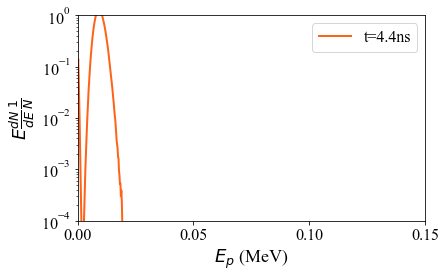

In [32]:
width = 3.2 * 2
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)

ax.tick_params(axis='major', direction='out')
plt.xlabel(r'$E_{p}$ (MeV)')
plt.ylabel(r'$E\frac{dN}{dE}\frac{1}{N}$')
plt.xlim([0.0, 0.15])
plt.xticks([0.0, 0.05, 0.1, 0.15])
plt.ylim([1e-4, 1])
ax.semilogy(ekin, data_norm * ekin * V / total_weight, '-', color = colors[1], label='t=4.4ns', linewidth=2)
# ax.set_xscale('log')
plt.legend()
plt.tight_layout()
fig.set_size_inches(width, height)
# plt.savefig('test.png')
# plt.clf()

In [50]:
de

20.440000000000005

In [52]:
ekin.shape

(100,)

Diag#1 - weight of species # 0 2 
    ekin from 0.0 to 0.4 in 1000 steps 




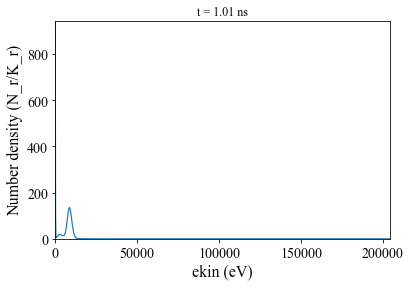

In [107]:
S.ParticleBinning(1,units=Units).plot()

In [55]:
data.size

100

In [108]:
nbin = ekin.size
gmax = ekin.max()
gmin = ekin.min()
dg   = (gmax - gmin) / nbin
we   = data

In [109]:
gg = np.linspace(gmin, gmax, nbin+1)
# gg = np.logspace(np.log10(gmin),np.log10(gmax),nbin+1)
nn = np.zeros(nbin)

In [110]:
for j in range(1,nbin+1):
        rr = np.where((ekin > gg[j-1]) & (ekin < gg[j]))
        nn[j-1] = np.sum(we[rr])
N = np.sum(nn)

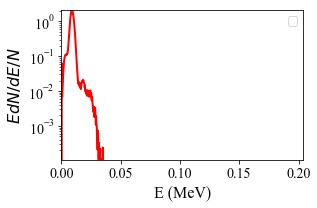

In [112]:
width = 3.2 * 1.5
height = width / 1.618
fig, ax0 = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.2, right=.9, top=.9)
# plt.loglog(gg[0:-1],gg[0:-1]*(nn)/(gg[1:]-gg[0:-1])/N,lw=2,color='red',linestyle='-')
plt.semilogy(gg[0:-1],gg[0:-1]*(nn)/(gg[1:]-gg[0:-1])/N,lw=2,color='red',linestyle='-')

plt.margins(0,0)
axes = plt.gca()
# axes.set_xlim(1e0,1e4)
# axes.set_ylim(1e-4,1e0)
plt.xlabel('E (MeV)')
plt.ylabel('$EdN/dE/N$') 
fig.set_size_inches(width, height)

plt.legend(loc='best', numpoints=1, fancybox=True)
plt.show()